# this code is used to do the cross correlation for different models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from html.entities import entitydefs

In [4]:
# 4 density models (homogeneous,single point, single layer, and random medium) will be generated and used for test
foldername = './Green_funs_for_different_models/'
Nmodel=4; Ns = 2526                                                                            # Number of model
Nx=501; Nz=501; dx=0.01; dz=0.01;                                                    # Mesh size and spacing  
Nt=3000; nt = Nt;  dt=0.002                                                          # Time sampling rate and sampling number

# Input simulated data 

In [5]:
filename = ['homogeneous','singlepoint','singlelayer','random']
GreenA = np.zeros([Nmodel,Ns,Nt])
GreenB = np.zeros([Nmodel,Ns,Nt])

for im in range(0,Nmodel):  
    tmpdata = np.fromfile(foldername+'GreenA_'+filename[im]+'.dat', dtype=np.float32) 
    tmpdata.shape=(Ns, Nt); GreenA[im] = tmpdata
    tmpdata = np.fromfile(foldername+'GreenB_'+filename[im]+'.dat', dtype=np.float32) 
    tmpdata.shape=(Ns, Nt); GreenB[im] = tmpdata

# Cross-correlation functions for active sources

In [6]:
CrossAB = np.zeros((Nmodel,Ns,Nt))        # Cross-correlation functions
ASCCFAB = np.zeros((Nmodel,Nt))           # Stacked cross-correlation functions

ir=0
for ir in range (0,Ns):
    for im in range (0,Nmodel):
        CrossAB[im,ir] = np.correlate(GreenA[im,ir], GreenB[im,ir], mode='same')
for im in range (0,Nmodel):
    ASCCFAB[im] = np.sum(CrossAB[im], axis=0)

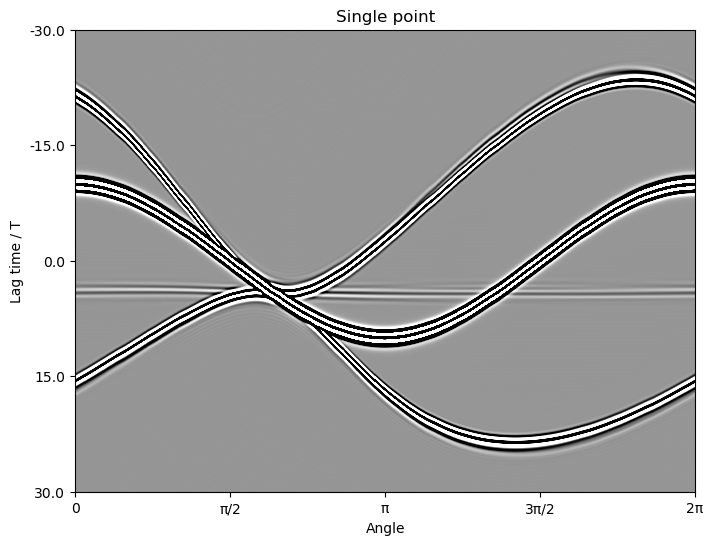

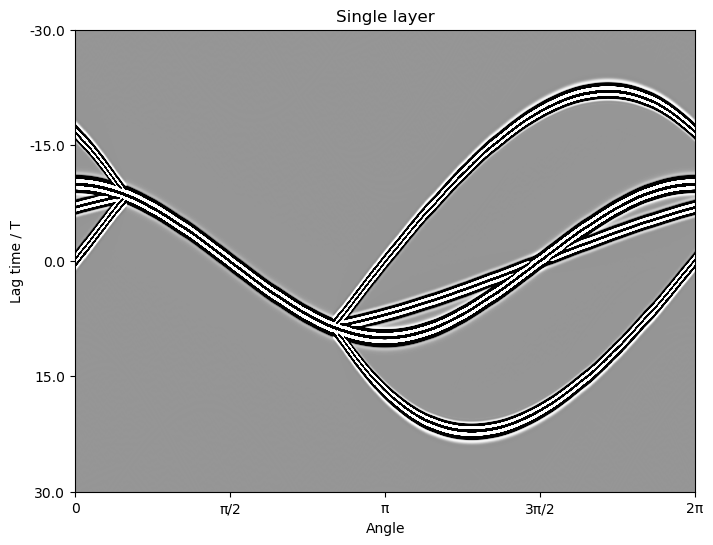

In [8]:
# Cross-correlation functions for individual impulsive sources from 0 to 2π 
# respect to single point scatter and single planar reflecto models : figure 5(b) and 8(b)
TT = ['Homogeneous medium', 'Single point','Single layer','Random medium']
fig_size = (8, 6)
fontsz = 14
ns=2526
xpos=np.arange(0,int(ns))
xaxis = ['0', entitydefs['pi']+'/2',entitydefs['pi'],'3'+entitydefs['pi']+'/2','2'+entitydefs['pi']]
ypos=np.arange(0,int(nt+1));yaxis = (np.arange(nt+1)*0.002-1.5)*20

for iv in (1,2):
    f, ax = plt.subplots(1,1, figsize=fig_size)
    ax.imshow(CrossAB[iv,:,750:2250].T/np.max(CrossAB[iv]),vmin=-0.01, vmax=0.01, cmap='Greys',aspect='auto')
    ax.set_xticks(xpos[0:int(ns):int(ns/4)], labels=xaxis)
    ax.set_yticks(ypos[0:int(nt/2+1):int(nt/8)], labels=yaxis[0:int(nt/2+1):int(nt/8)])
    ax.set_xlabel('Angle');ax.set_ylabel('Lag time / T')
    ax.set_title(TT[iv])

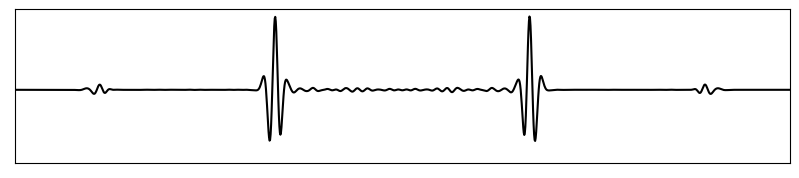

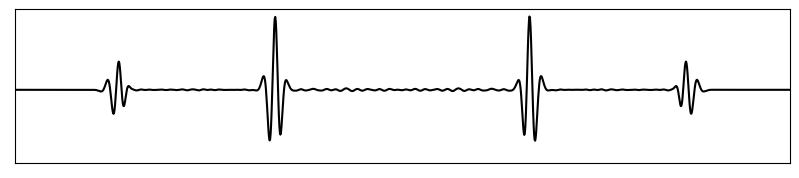

In [9]:
# Stacked cross-correlation functions for single point scatter and single planar reflecto : figure 5(c) and 8(c)
fig_size = (10, 2)
fontsz = 14
ypos=np.arange(0,int(nt)+1);yaxis = (np.arange(nt+1)*0.002-1.5)*20

for iv in  (1,2):
    f, ax = plt.subplots(1,1, figsize=fig_size)
    ax.plot((ASCCFAB[iv]/np.max(ASCCFAB[iv])),'k')
    ax.set_ylim(-1,1.1); ax.set_xlim(750,2250) 
    plt.xticks([]);plt.yticks([])